<a href="https://colab.research.google.com/github/junghyeon0114/python_machine/blob/main/2_CH01_04~05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ch01 04~05  (p39-86)


판다스 (apply, dataframe 변환, iloc, loc)

#04 데이터 핸들링 - 판다스

파이썬에서 데이터 처리를 위해 존재하는 가장 인기 있는 라이브러리.

일반적으로 대부분의 데이터 세트는 2차원. 판다스는 2차원 데이터를 효율적으로 가공,처리 할 수 있는 다양한 기능 제공.



**판다스 시작 : 파일을 DataFrame으로 로딩, 기본 API**

read_table( ) : 문자구분 탭

read_csv( ) : 문자구분 디폴트는 콤마

              별 지정 없으면 파일의 맨 처음 row를 칼럼명으로 인지.

    ex) read_csv('주소', sep= ',')

    ex) read_csv('주소', sep= '\t')

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv(r'/content/drive/MyDrive/파이썬 머신러닝 데이터/캐글 타이타닉 machine learning from disaster/train.csv')

titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print('DataFrame 크기:', titanic_df.shape)

DataFrame 크기: (891, 12)


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


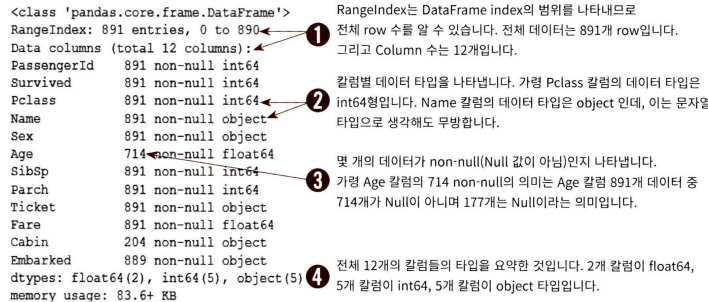

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**value_counts( )**

많은 건수 순서대로 개수를 반환함. series 객체에서만 사용가능. dataframe에서는 불가능.

In [6]:
value_counts = titanic_df['Pclass'].value_counts()

value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

**DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환**



- 넘파이 ndarray, 리스트, 딕셔너리를 dataframe으로 변환





1. 리스트를 이용해 DataFrame 생성

      ex) df_list1 = pd.DataFrame(list1, columns=col_name1)


2. 넘파이 ndarray를 이용해 DatafFrame 생성.

     ex) df_array1 = pd.DataFrame(array1, columns=col_name1)

3. 딕셔너리를 datafame으로 생성

    ex) df_dict = pd.DataFrame(dict)





In [7]:
import numpy as np

col_name1=['col1']
list1= [1,2,3]
array1 = np.array(list1)
print('array1 shape:', array1.shape)

# 리스트를 이용해 DataFrame 생성
df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)

# 넘파이 ndarray를 이용해 DatafFrame 생성.
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)


array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [8]:
list2 = [[1,2,3],
         [11,12,13]]

#칼럼명 3개 필요
col_name2=['col1', 'col2', 'col3']

array2 = np.array(list2)

#2차원 리스트로 만든 dataframe
df=pd.DataFrame(list2, columns=col_name2)
df

,col1,col2,col3
0,1,2,3
1,11,12,13


In [9]:
#2차원 ndarray로 만든 DataFrame
df_2=pd.DataFrame(array2, columns=col_name2)
df_2

,col1,col2,col3
0,1,2,3
1,11,12,13


- 딕셔너리를 DataFrame으로 변환

일반적으로 딕셔너리를 DataFrame으로 변환 시에는 딕셔너리의 키는 칼럼명으로, 딕셔너리의 값은 키에 해당하는 칼럼 데이터로 변환.

따라서 키의 경우는 문자열, 값의 경우는 리스트 or ndarray 형태로 구성.


In [10]:
dict= {'col1':[1,11], 'col2':[2,22], 'col3':[3,33]}
dict

{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}

In [11]:
#딕셔너리로 df 만들기
df_dict = pd.DataFrame(dict)
df_dict

,col1,col2,col3
0,1,2,3
1,11,22,33


**DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환하기**

1. df -> ndarray

    ex) df_dict.values
2. df -> 리스트

    ex) df_dict.values.tolist()

3. df -> 딕셔너리

    ex) list3 = df_dict.values.to_dict()

In [12]:
# datafame을 ndarray로 변환
array3=df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values shape:', array3.shape)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)


In [13]:
print(array3)

[[ 1  2  3]
 [11 22 33]]


In [14]:
# df를 리스트로

list3 = df_dict.values.tolist()

print(type(list3))
list3

<class 'list'>


[[1, 2, 3], [11, 22, 33]]

In [15]:
# df를 dictionary

dict3=df_dict.to_dict('list')
print(type(dict3))
dict3

<class 'dict'>


{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}

**dataframe의 칼럼 데이터 세트 생성과 수정**

    ex) titanic_df['Age_0']=0


In [16]:
titanic_df['Age_0']=0
titanic_df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [17]:
#새로운 칼럼 생성
titanic_df['Famaily_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Famaily_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


**dataframe 데이터 삭제**

DataFrame. drop(lables=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

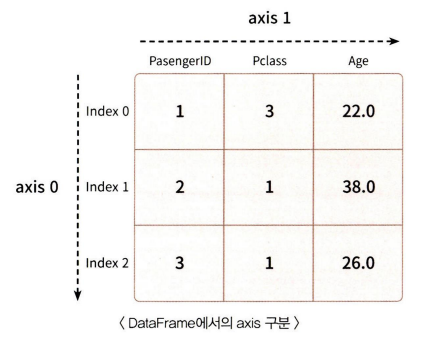

titanic_df.drop([0,1,2], axis=0, inplace=True)


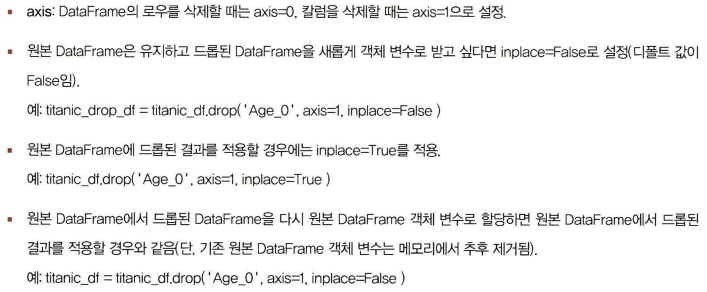

In [18]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1)
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Famaily_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [19]:
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth', 15)

print('### before axis 0 drop ###')
print(titanic_df.head(3))

### before axis 0 drop ###
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked  Age_0  Famaily_No
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S      0           2
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C      0           2
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S      0           1


In [20]:
titanic_df.drop([0,1,2], axis=0, inplace=True)

print('### after axis 0 drop ###')
print(titanic_df.head(3))

### after axis 0 drop ###
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Age_0  Famaily_No
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S      0           2
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S      0           1
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q      0           1


**index 객체**

RDBMS의 PK와 유사하게 DataFrame, Series의 레코드를 고유하게 식별하는 객체.

    ex) indexes = titanic_df.index


In [22]:
titanic_df = pd.read_csv(r'/content/drive/MyDrive/파이썬 머신러닝 데이터/캐글 타이타닉 machine learning from disaster/train.csv')

In [24]:
#index 객체 추출

indexes = titanic_df.index
print(indexes)

RangeIndex(start=0, stop=891, step=1)


In [25]:
# index 객체를 실제 값 array로 변환
print(indexes.values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [26]:
type(indexes.values)

numpy.ndarray

In [27]:
indexes.values.shape

(891,)

In [28]:
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

[0 1 2 3 4]
[0 1 2 3 4]
6


In [30]:
series_fair = titanic_df['Fare']

print(series_fair.max())
print(series_fair.sum())
print(sum(series_fair))

512.3292
28693.9493
28693.949299999967


In [32]:
titanic_df.reset_index(inplace=False)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
value_counts=titanic_df.Pclass.value_counts()

value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [37]:
# series에 reset_index() 를 적용하면 새롭게 연속 숫자형 인덱스가 만들어지고 기존 인덱스는 'index' 칼럼명으로 추가되면서 DataFrame으로 변환됨을 알 수 있음
value_counts.reset_index(inplace=False)

,index,Pclass
0,3,491
1,1,216
2,2,184


**데이터 셀렉션 및 필터링**

넘파이에서는 [ ] 를 활용해 인덱싱 활동 가능

판다스에서는 ix[], iloc[], loc[] 연산자를 통해 동일한 작업

**DataFrame의 [] 연산자**

넘파이에서는 [] 연산자를 통해 행의 위치, 열의 위치, 슬라이싱 범위 등을 지정해 데이터 가져올 수 있음.

하지만 dataframe 바로 뒤에 있는 [ ] 안에 들어갈 수 있는 것은 칼럼 명 문자 또는 인덱스로 변환 가능한 표현식이다.

    ex) dataframe[0] 은 오류를 발생시킴 : []에는 칼럼명을 지정해야하지만 0은 칼럼명이 아니기때문.

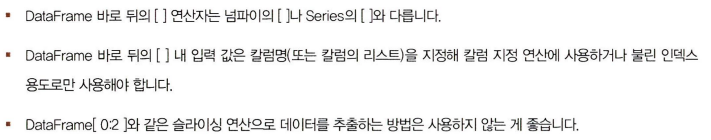

In [39]:
titanic_df[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [40]:
titanic_df[0]

KeyError: ignored

In [41]:
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [43]:
titanic_df[titanic_df['Pclass']==3].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. ...",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Ma...",male,2.0,3,1,349909,21.0750,NaN,S


**DataFrame의 ix[ ] 연산자**  

    EX) df.ix[0, 'Pclass'] : 행 위치 지정으로 원하는 위치의 데이터 추출
    EX) df.ix[0,2]         : 칼럼명이 아닌 인덱스 위치값으로도 가능


현재 지원X

**명령 기반 인덱싱과 위치 기반 인덱싱의 구분**

명칭 기반 : 칼럼의 명칭을 기반으로

위치 기반 : 인덱싱 0을 출발점으로 하는 가로축, 세로축 좌표 기반의 행과 열 위치를 기반으로 데이터 지정.


**DataFrame iloc[ ] 연산자**

괄호안에 무조건 위치 기반 인덱싱만 가능. 명칭 입력시 오류

    ex) df.iloc[0,0]

**DataFrame loc[] 연산자**

명칭 기반으로 데이터 추출. 행위치에는 DataFrame의 인덱스 값을, 열 위치에는 칼럼 명을 입력해주어야 함.

    ex) titanic_df.loc[titanic_df['Age']>60,['Name','Age']].head()

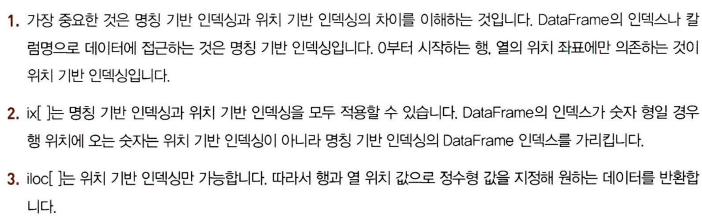

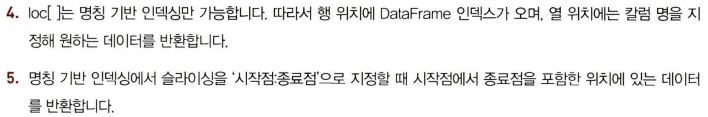

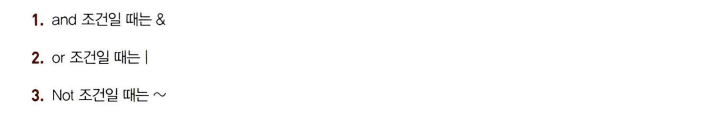

In [50]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic_df.loc[0, 'Pclass']

3

**불린 인덱싱**


In [54]:
titanic_df[titanic_df['Age']>60].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr...",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S


In [56]:
titanic_df.loc[titanic_df['Age']>60,['Name','Age']].head()

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0
116,"Connors, Mr...",70.5
170,Van der hoe...,61.0


In [57]:
titanic_df[ (titanic_df['Age']>60) & (titanic_df['Pclass']==1)&(titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


**정렬, Aggregation 함수, GroupBy 적용**

**DataFrame, Series의 정렬 - sort_values()**

ascending=Flase : 내림차순

ascending=True : 오름차순   ----------> 기본값

    ex)titanic_df.sort_values(by=['Name'])

In [59]:
titanic_sorted = titanic_df.sort_values(by=['Name'])

titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr....",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr....",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs...",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [61]:
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Name'], ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,van Melkebe...,male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,van Billiar...,male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,de Pelsmaek...,male,16.0,0,0,345778,9.5,NaN,S


**Aggregation 함수**

df에서 min(), max(), sum(), count() 같은 함수는 Aggregation

    ex) df.groupby(by='Pclass')['Age'].agg([max,min])

In [62]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [63]:
titanic_df[['Age','Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

**groupby() 적용**

    ex)df.groupby(by='Pclass')

In [66]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [67]:
titanic_groupby = titanic_df.groupby(by='Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [69]:
titanic_groupby = titanic_df.groupby(by='Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [73]:
titanic_df.groupby('Pclass')['Age'].agg([max,min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [75]:
agg_format= {'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


#**결손데이터 처리**

**1. isna()로 결손 데이터 여부 확인**

    ex) df.isna()


In [77]:
titanic_df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**2. fillna()로 결손 데이터 대체하기**

    ex) dataframe['열이름'].fillna('대체할 값')


In [83]:
titanic_df['Cabin']=titanic_df['Cabin'].fillna('C000')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,C000,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,C000,S


In [87]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked']=titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**apply lambda 식으로 데이터 가공**

In [88]:
def get_square(a):
  return a**2

print('3의 제곱은:', get_square(3))

3의 제곱은: 9


In [91]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'child' if x <=15 else 'Adult')

titanic_df[['Age', 'Child_Adult']].head()

,Age,Child_Adult
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


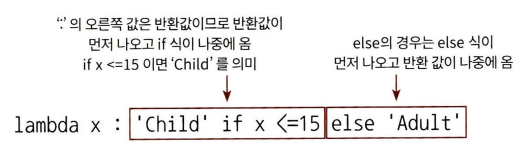

In [92]:
#나이에 따라 세분화된 분류를 수행하는 함수 생성.

def get_category(age):
  cat = ''
  if age <=5: cat='Baby'
  elif age <=12: cat='child'
  elif age <=18: cat='Teenager'
  elif age <=25: cat='Student'
  elif age <=35: cat='Young Adult'
  elif age <=60: cat='Adult'
  else : cat= 'Elderly'

  return cat


#labmbda 식에 위에서 생성한 get_category( )함수를 반환값으로 지정.

#get_category(x)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
